<Figure size 432x288 with 0 Axes>

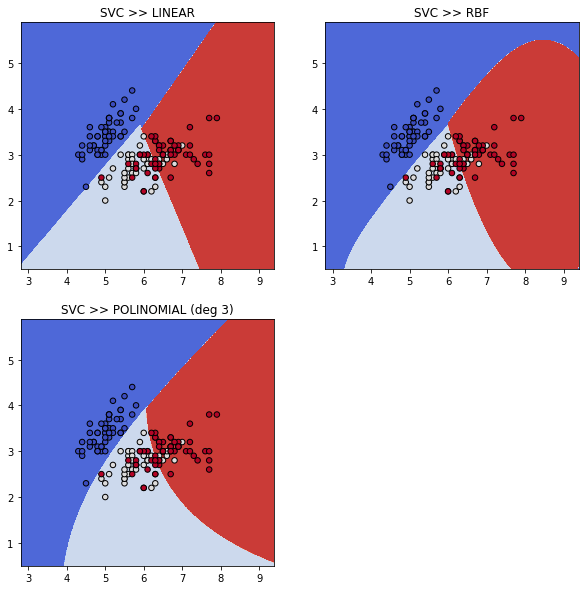

In [3]:
import numpy as np
import pylab as ax
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2] # Розглядаємо тільки перші дві фічі
Y = iris.target

lin_svc  = svm.SVC(kernel='linear').fit(X, Y)
rbf_svc  = svm.SVC(kernel='rbf').fit(X, Y)
poly_svc = svm.SVC(kernel='poly').fit(X, Y)

# сітка
x_min, x_max = X[:,0].min()-1.5, X[:,0].max()+1.5
y_min, y_max = X[:,1].min()-1.5, X[:,1].max()+1.5

# матриця
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))

titles = ['SVC >> LINEAR', 'SVC >> RBF', 'SVC >> POLINOMIAL (deg 3)']
ax.set_cmap(cmap=plt.cm.coolwarm)
ax.figure(figsize=(10, 10))

for i, clf in enumerate((lin_svc, rbf_svc, poly_svc)):
    # малюємо результат
    ax.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z)
    # накладаємо тренувальний сет
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=30, edgecolors="k")
    ax.title(titles[i])
    ax.Axes